# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [2]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'C:\\Users\\hegoi\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [3]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [4]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

C:\Users\hegoi\AppData\Local\Temp\ipykernel_1556\4045023703.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [8]:
df[df['Horsepower']=="?"]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [9]:
df['Horsepower'] = np.where(df['Horsepower']=="?", np.nan, df['Horsepower'])
df['Horsepower'] = df['Horsepower'].astype(float)
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


C:\Users\hegoi\AppData\Local\Temp\ipykernel_1556\353453926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)


In [10]:
df['Origin'].value_counts()

Origin
1    249
3     79
2     70
Name: count, dtype: int64

In [11]:
# df[df['Origin']==1] # Americano
# df[df['Origin']==2] # Europeo
# df[df['Origin']==3] # Japoneses

In [12]:
# df[df['Origin']==3]['MPG'].mean()

In [13]:
df['USA'] = np.where(df['Origin']==1, 1,0)
df['Europe'] = np.where(df['Origin']==2, 1,0)
df['Japan'] = np.where(df['Origin']==3, 1,0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,0


In [14]:
lista_marcas = df['Car name'].str.split(expand=True, n=1)[0]
lista_marcas.value_counts()

0
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
saab              4
subaru            4
opel              4
chevy             3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64

In [15]:
df['Marca'] = lista_marcas.copy()
orden = df.groupby("Marca")['MPG'].mean().sort_values()
orden

Marca
hi                9.000000
chevroelt        16.000000
chrysler         17.266667
chevy            18.000000
amc              18.246429
mercury          19.118182
buick            19.182353
ford             19.694118
cadillac         19.750000
pontiac          20.012500
chevrolet        20.472093
oldsmobile       21.100000
volvo            21.116667
plymouth         21.703226
dodge            22.060714
toyouta          23.000000
mercedes-benz    23.250000
peugeot          23.687500
bmw              23.750000
saab             23.900000
capri            25.000000
mercedes         25.400000
opel             25.750000
maxda            26.050000
audi             26.714286
toyota           28.372000
fiat             28.912500
volkswagen       29.106667
vokswagen        29.800000
subaru           30.525000
mazda            30.860000
datsun           31.113043
renault          32.880000
honda            33.761538
triumph          35.000000
nissan           36.000000
vw               39.01

In [16]:
len(orden)

37

In [17]:
le = pd.DataFrame(np.arange(1,38), columns=["le_marca"], index=orden.index)
le


,le_marca
Marca,
hi,1
chevroelt,2
chrysler,3
chevy,4
amc,5
mercury,6
buick,7
ford,8
cadillac,9


In [18]:
df = pd.merge(df, le, left_on="Marca", right_index=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name,USA,Europe,Japan,Marca,le_marca
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,0,chevrolet,11
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,0,buick,7
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,0,plymouth,14
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,0,amc,5
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,0,ford,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,1,0,0,ford,8
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0,1,0,vw,37
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,1,0,0,dodge,15
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,1,0,0,ford,8


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [19]:
# df.drop(columns=["Car name", "Origin", "Marca"], inplace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name,USA,Europe,Japan,Marca,le_marca
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,0,chevrolet,11
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,0,buick,7
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,0,plymouth,14
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,0,amc,5
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,0,ford,8


In [20]:
df.drop(columns=["Car name","Marca"],inplace=True)

In [21]:
df.shape

(398, 12)

In [22]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

In [23]:
print(train.shape)
print(test.shape)

(318, 12)
(80, 12)


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

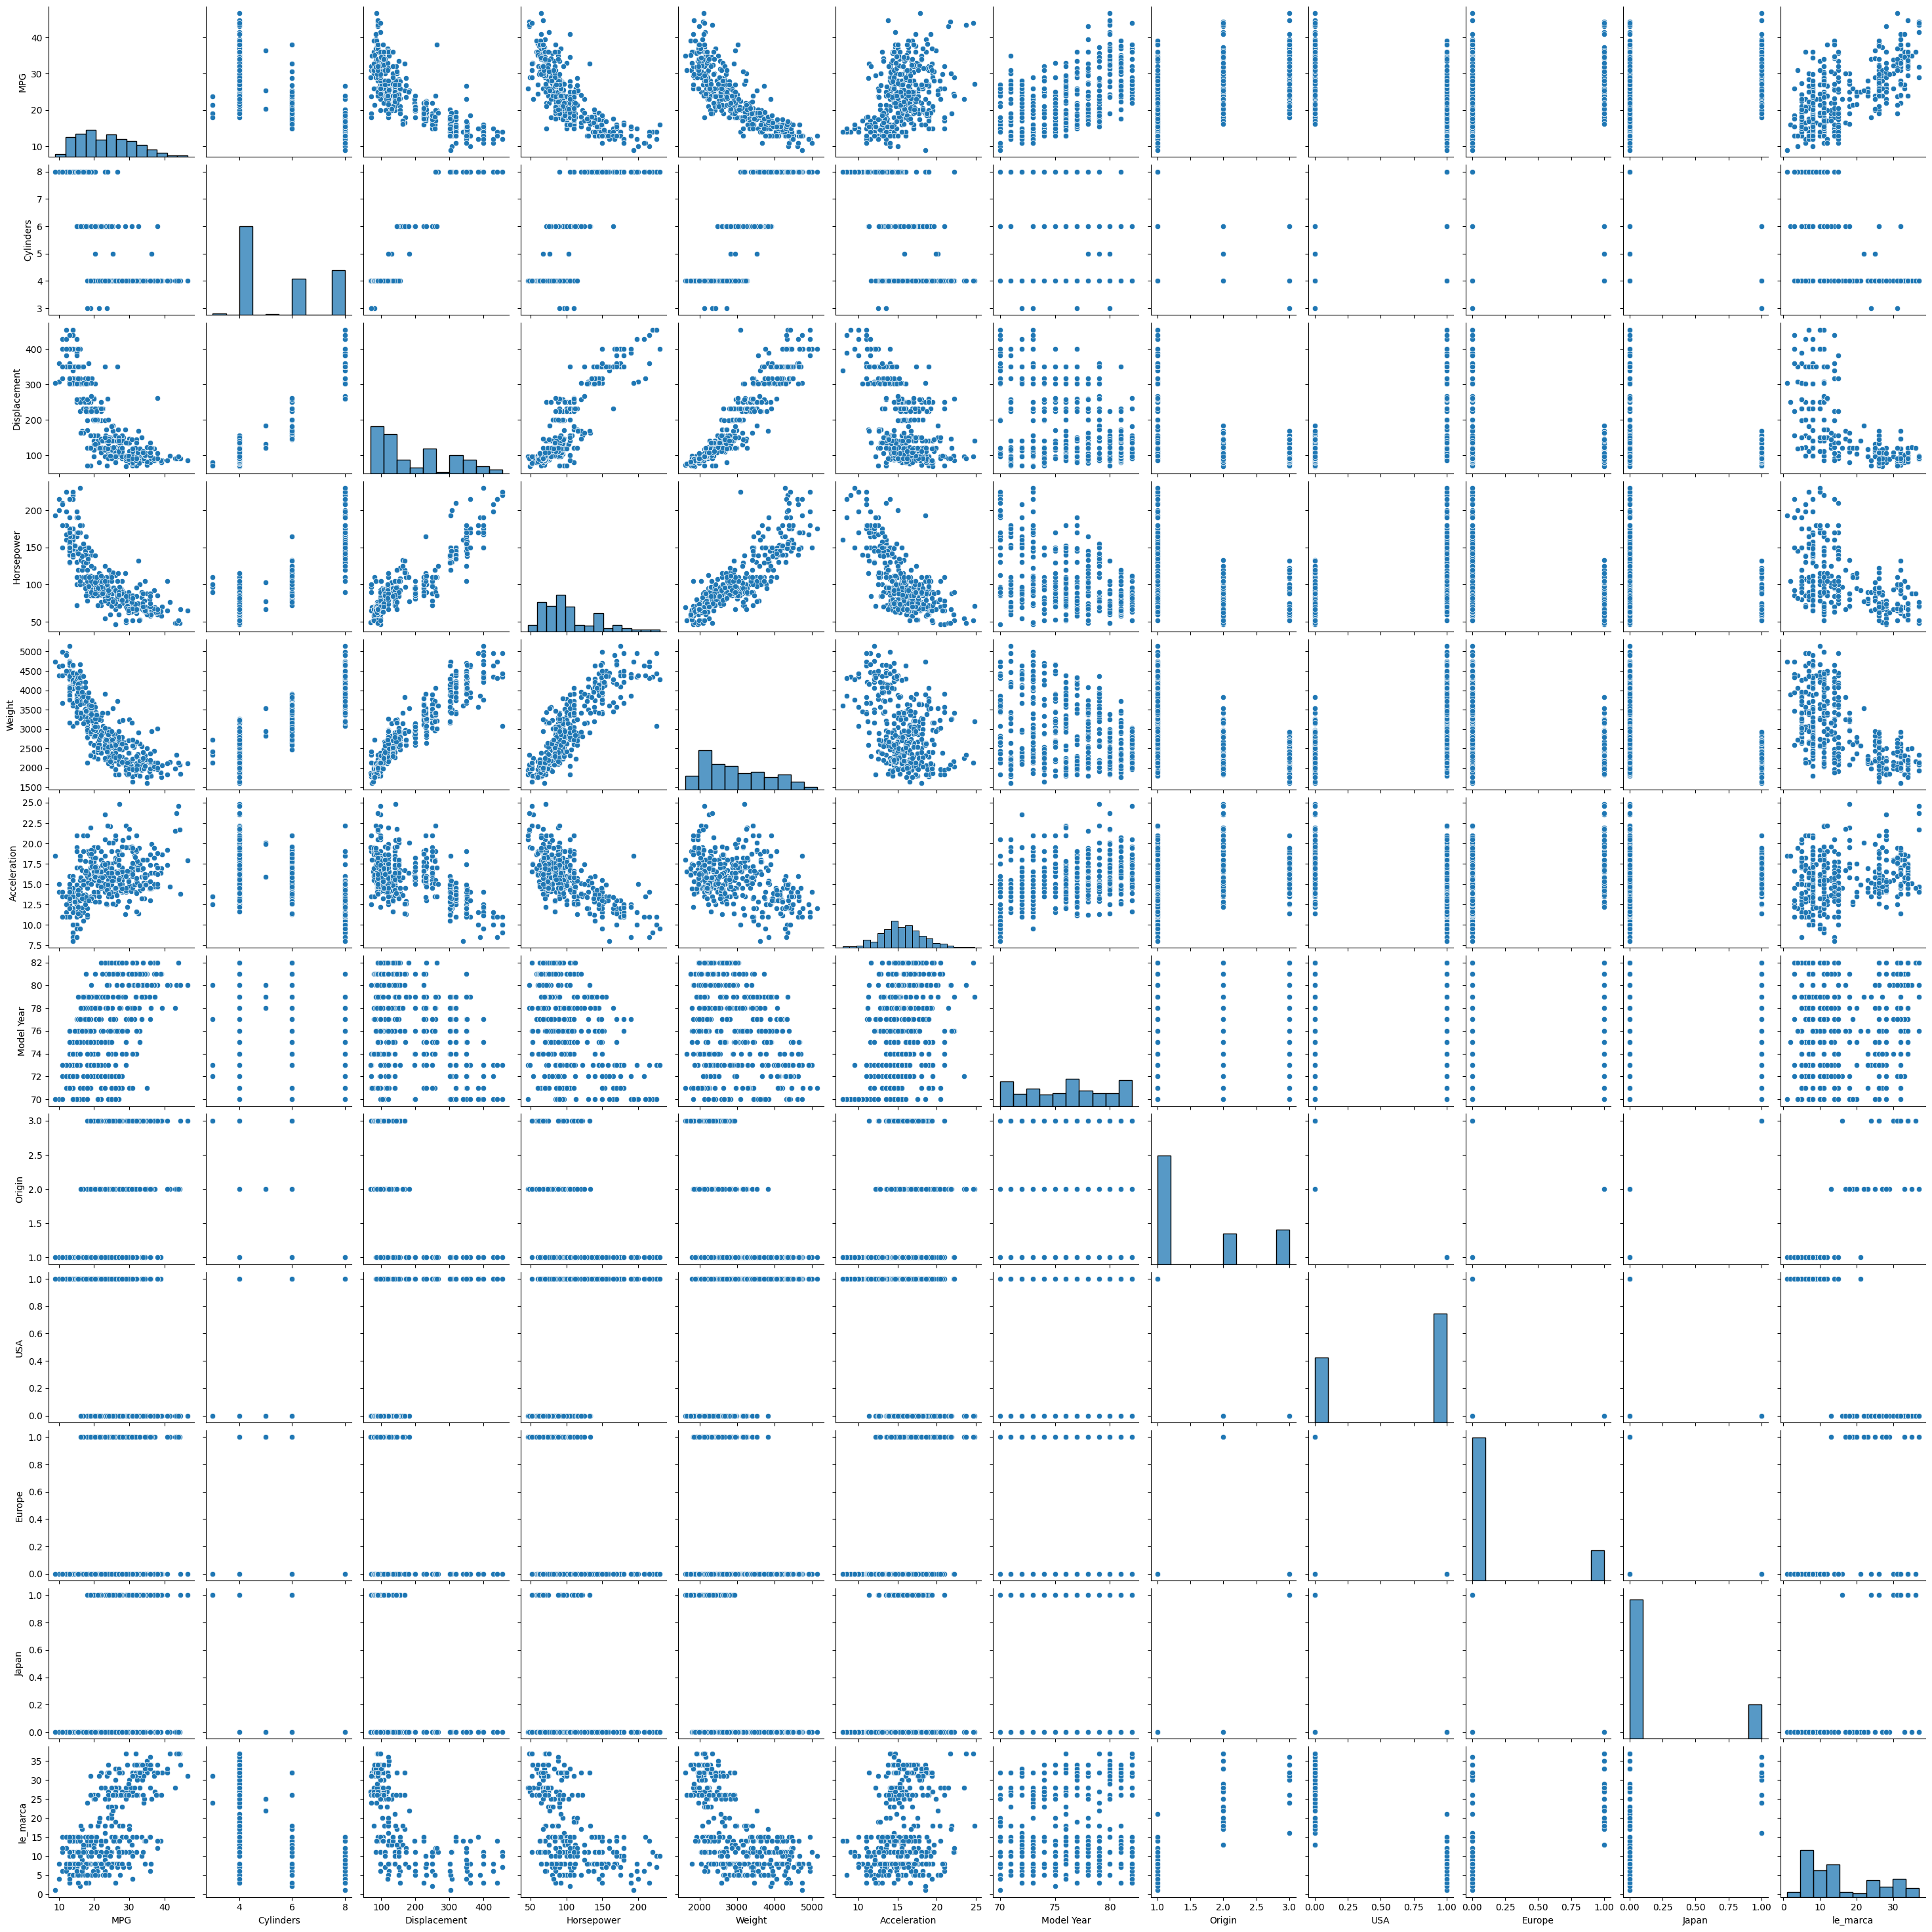

In [24]:
sns.pairplot(df)

Tambien revise las estadisticas generales:

In [25]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan,le_marca
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,0.625628,0.175879,0.198492,16.381910
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055,0.484569,0.381197,0.399367,9.771179
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,0.000000,0.000000,0.000000,8.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000,14.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000,0.000000,0.000000,26.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000,37.000000


<Axes: >

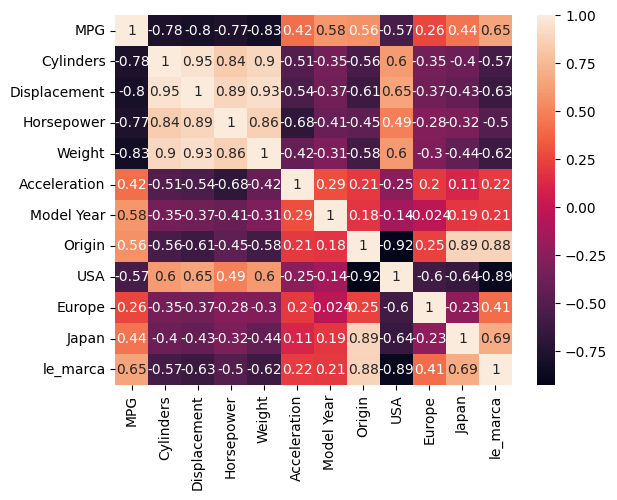

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Separa las features del target

Separe el target de las features.

In [27]:
X_train = train.drop(columns="MPG")
X_test = test.drop(columns="MPG")
y_train = train['MPG']
y_test = test['MPG']

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 11)
(80, 11)
(318,)
(80,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trian_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [30]:
X_train.shape[1:]

(11,)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

model.compile(
    loss="mse",
    optimizer= keras.optimizers.RMSprop(0.001),
    metrics=['mae','mse']
)

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
10*64 + 64

704

In [34]:
64*16 + 16

1040

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [35]:
X_trian_scal.shape

(318, 11)

In [36]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_trian_scal, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 610.7365 - mae: 23.3944 - mse: 610.7365 - val_loss: 504.9647 - val_mae: 20.9490 - val_mse: 504.9647
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 524.8369 - mae: 21.5812 - mse: 524.8369 - val_loss: 461.7854 - val_mae: 19.9291 - val_mse: 461.7854
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 508.5429 - mae: 21.2177 - mse: 508.5429 - val_loss: 418.5753 - val_mae: 18.8647 - val_mse: 418.5753
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 457.1654 - mae: 19.9399 - mse: 457.1654 - val_loss: 373.1379 - val_mae: 17.6797 - val_mse: 373.1379
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 417.8602 - mae: 19.2009 - mse: 417.8602 - val_loss: 326.2598 - val_mae: 16.3844 - val_mse: 326.2598
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 324.5723 - mae: 16.6462 - mse: 324.5723 - val_loss: 277.7422 - val_mae: 14.9685 - val_mse: 277.7422
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [37]:
history.history

{'loss': [599.4601440429688,
  543.3280029296875,
  494.6573181152344,
  443.8035888671875,
  390.598388671875,
  335.05804443359375,
  279.4447326660156,
  225.3626708984375,
  174.825927734375,
  130.14466857910156,
  93.17652893066406,
  65.05590057373047,
  46.139530181884766,
  33.902767181396484,
  26.44391441345215,
  21.616384506225586,
  18.384462356567383,
  16.265594482421875,
  14.886533737182617,
  13.724599838256836,
  12.52340030670166,
  11.701329231262207,
  11.138350486755371,
  10.297714233398438,
  9.736184120178223,
  9.365946769714355,
  8.9039945602417,
  8.421225547790527,
  8.121562957763672,
  7.923595428466797,
  7.779951572418213,
  7.5390400886535645,
  7.502075672149658,
  7.181238651275635,
  7.12929105758667,
  7.088578701019287,
  6.927489280700684,
  6.739144802093506,
  6.53486967086792,
  6.441888809204102,
  6.424999237060547,
  6.3592963218688965,
  6.318868637084961,
  6.3367533683776855,
  6.1182708740234375,
  6.1113080978393555,
  6.03335762023

<Axes: >

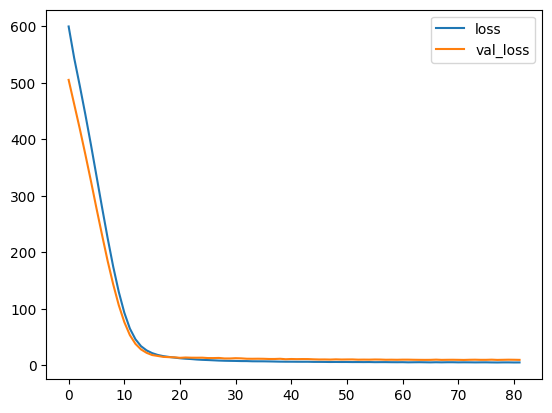

In [38]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

¿Alguna conclusión respecto a este gráfico?

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [39]:
model.evaluate(X_test_scal, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5231 - mae: 2.1306 - mse: 7.5231  


[7.5211992263793945, 2.152320623397827, 7.5211992263793945]

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [40]:
model.predict(X_test_scal[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[15.091662],
       [15.125852],
       [20.43342 ],
       [23.814169],
       [17.234877],
       [12.744517],
       [18.70186 ],
       [27.004261],
       [24.752594],
       [27.304958]], dtype=float32)

In [41]:
y_pred = model.predict(X_test_scal)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[15.091662 ],
       [15.125852 ],
       [20.43342  ],
       [23.814169 ],
       [17.234877 ],
       [12.744517 ],
       [18.70186  ],
       [27.004261 ],
       [24.752594 ],
       [27.304958 ],
       [28.057142 ],
       [29.610796 ],
       [26.455662 ],
       [25.890059 ],
       [24.682528 ],
       [14.804029 ],
       [14.825753 ],
       [14.10781  ],
       [18.8125   ],
       [28.817575 ],
       [13.257092 ],
       [13.4600725],
       [17.147295 ],
       [24.647486 ],
       [16.06712  ],
       [25.932837 ],
       [28.221186 ],
       [15.892277 ],
       [16.017996 ],
       [18.760538 ],
       [19.604761 ],
       [21.388838 ],
       [16.278383 ],
       [16.086983 ],
       [16.943403 ],
       [15.244796 ],
       [19.672283 ],
       [17.632362 ],
       [28.81127  ],
       [19.565607 ],
       [14.676503 ],
       [16.437788 ],
       [28.957914 ],
       [29.369844 ],
       [25.615614 ],
       [27.29327  ],
       [18.494616 ],
       [18.11

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

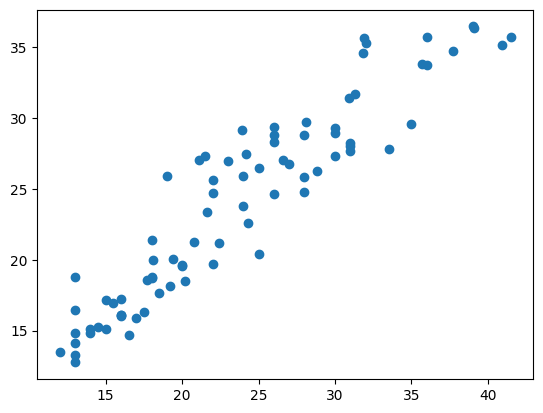

In [42]:
plt.scatter(y_test, y_pred)

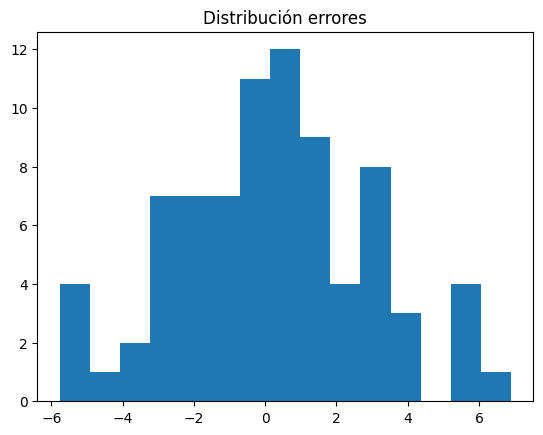

In [43]:
error = y_pred.ravel() - y_test
plt.hist(error, bins=15)
plt.title("Distribución errores");

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [44]:
model.save("final_model.keras")

In [45]:
imported_model = keras.models.load_model("final_model.keras")
imported_model

<Sequential name=sequential, built=True>

## Conclusion